In [9]:
import numpy as np 
import matplotlib.pyplot as plt # Import which allows for Scatter plots to be implemented and used
from sklearn.datasets import load_iris # Built in dataset that is also located here "https://archive.ics.uci.edu/dataset/53/iris"
from sklearn.svm import SVC # Support Vector Classifier, used to train the model
from sklearn.metrics import confusion_matrix # Imports Confusion Matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
iris = load_iris() # Loads the dataset
# The roles, Feature role and Target role
X = iris.data[:, :2 ]  # This uses just two out of the 5 features, these current features are the [sepal length] and [sepal width]
y = iris.target  # There are 3 Targets [Iris Setosa, Iris Versicolour and Iris Virginica]. This code Targets all of them.

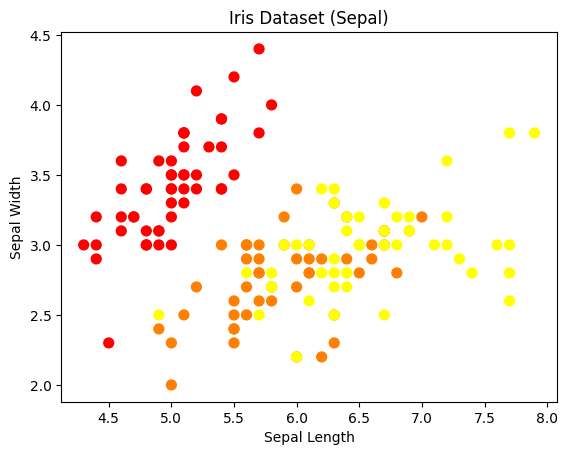

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # Creating the scatter plot, X-axis is the 1st feature [sepal length] and y-axis is the [sepal width] with c=y being the [color] of Y and S being the [size] and smap is the color of the map which is used.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Sepal)')
plt.show() # Displaying the scatter plot

In [12]:
# Training the model
model = SVC(kernel='linear') # Creates the SVM classifier which uses a Linear kernel
model.fit(X, y) # Training the model based off of X [target] and Y [Features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
def plot_decision_boundary(model, X, y):
    # Get the minimum and maximum values of the first feature (sepal length)
    x_min = X[:, 0].min() - 1  # Subtract 1 for padding
    x_max = X[:, 0].max() + 1  # Add 1 for padding
    # Get the minimum and maximum values of the second feature (sepal width)
    y_min = X[:, 1].min() - 1 
    y_max = X[:, 1].max() + 1 

    # Generate a range of values for the x-axis (sepal length)
    x_values = np.arange(x_min, x_max, 0.02)  # Step size of 0.02
    
    # Generate a range of values for the y-axis (sepal width)
    y_values = np.arange(y_min, y_max, 0.02)  # Step size of 0.02
    
    # Create a meshgrid from the x and y values
    xx, yy = np.meshgrid(x_values, y_values)

    # Step 3: Predict the class for each point in the grid
    # Flatten the meshgrid and stack the x and y values into a 2D array
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Use the model to predict the class for each point in the grid
    Z = model.predict(grid_points)
    
    # Reshape the predictions to match the shape of the meshgrid
    Z = Z.reshape(xx.shape)

    # Step 4: Plot the decision boundaries
    # Fill the regions between the decision boundaries with colors
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='autumn')
    
    # Step 5: Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap='autumn')
    
    # Step 6: Add labels and title
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundaries (2 Features)')
    
    # Step 7: Show the plot
    plt.show()

In [14]:
# Plots the model
# plot_decision_boundary(model, X, y)

In [15]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


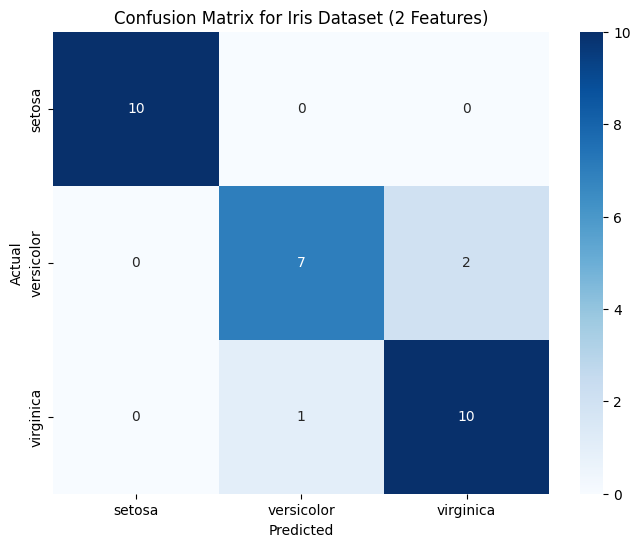

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris Dataset (2 Features)')
plt.show()